In [11]:
#importing libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.metrics as sm


In [12]:
%matplotlib inline

In [13]:
mobile_dataset = pd.read_csv('dataSet.csv')

In [14]:
mobile_dataset

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [ ]:
# handling of missing data

In [15]:
print((mobile_dataset[["battery_power","clock_speed","fc","int_memory","m_dep","mobile_wt","n_cores","pc","px_height","px_width","ram","sc_h","sc_w"]]==0).sum())


battery_power      0
clock_speed        0
fc               474
int_memory         0
m_dep              0
mobile_wt          0
n_cores            0
pc               101
px_height          2
px_width           0
ram                0
sc_h               0
sc_w             180
dtype: int64


In [16]:
mobile_dataset.fillna(mobile_dataset.mean(),inplace=True)

In [17]:
print(mobile_dataset.isnull().sum())

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64


In [18]:
mobile_dataset

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
labelencoder=LabelEncoder()

In [21]:
dataTransform = mobile_dataset.copy()

In [22]:
# transfer data into an order
for data in mobile_dataset.columns:
    dataTransform[data]=labelencoder.fit_transform(mobile_dataset[data])

In [23]:
dataTransform

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,255,0,17,0,1,0,5,5,108,1,...,18,186,963,4,7,17,0,0,1,1
1,382,1,0,1,0,1,51,6,56,2,...,738,1099,998,12,3,5,1,1,0,2
2,48,1,0,1,2,1,39,8,65,4,...,962,901,984,6,2,7,1,1,0,2
3,88,1,20,0,0,0,8,7,51,5,...,935,954,1055,11,8,9,1,0,0,2
4,954,1,7,0,13,1,42,5,61,1,...,928,517,499,3,2,13,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,216,1,0,1,0,1,0,7,26,5,...,939,1022,180,8,4,17,1,1,0,0
1996,1064,1,21,1,0,0,37,1,107,3,...,745,1080,732,6,10,14,1,1,1,2
1997,1027,0,4,1,1,1,34,6,28,7,...,716,834,1158,4,1,3,1,1,0,3
1998,732,0,4,0,4,1,44,0,65,4,...,283,120,266,13,10,17,1,1,1,0


In [24]:
# spilt data x- inputs
x=dataTransform.drop(['price_range'],axis=1)


In [25]:
x

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,255,0,17,0,1,0,5,5,108,1,2,18,186,963,4,7,17,0,0,1
1,382,1,0,1,0,1,51,6,56,2,6,738,1099,998,12,3,5,1,1,0
2,48,1,0,1,2,1,39,8,65,4,6,962,901,984,6,2,7,1,1,0
3,88,1,20,0,0,0,8,7,51,5,9,935,954,1055,11,8,9,1,0,0
4,954,1,7,0,13,1,42,5,61,1,14,928,517,499,3,2,13,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,216,1,0,1,0,1,0,7,26,5,14,939,1022,180,8,4,17,1,1,0
1996,1064,1,21,1,0,0,37,1,107,3,3,745,1080,732,6,10,14,1,1,1
1997,1027,0,4,1,1,1,34,6,28,7,3,716,834,1158,4,1,3,1,1,0
1998,732,0,4,0,4,1,44,0,65,4,5,283,120,266,13,10,17,1,1,1


In [26]:
#  y- output
y= dataTransform['price_range']

In [27]:
y

0       1
1       2
2       2
3       2
4       1
       ..
1995    0
1996    2
1997    3
1998    0
1999    3
Name: price_range, Length: 2000, dtype: int64

In [28]:
#feature extraction

mobile_feature_list= list(x.columns)

In [29]:
mobile_feature_list

['battery_power',
 'blue',
 'clock_speed',
 'dual_sim',
 'fc',
 'four_g',
 'int_memory',
 'm_dep',
 'mobile_wt',
 'n_cores',
 'pc',
 'px_height',
 'px_width',
 'ram',
 'sc_h',
 'sc_w',
 'talk_time',
 'three_g',
 'touch_screen',
 'wifi']

In [30]:
# spilt data into trainning and testing data
from sklearn.model_selection import train_test_split

In [31]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=41)

In [32]:
x_train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
1519,611,1,25,0,3,0,58,7,100,1,4,67,43,1392,0,2,7,1,0,0
1068,434,1,0,0,4,0,43,4,117,0,5,146,545,134,4,1,8,1,1,0
631,410,1,6,0,0,1,24,7,21,4,2,928,532,1477,12,16,3,1,0,1
508,61,0,17,0,0,0,57,6,105,4,6,665,819,1073,14,17,7,0,0,1
1006,314,0,0,1,11,0,11,2,79,0,15,231,51,330,3,4,15,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321,1078,0,0,1,2,1,27,7,97,0,13,262,1039,1499,7,10,16,1,0,0
1104,359,1,13,1,4,1,53,6,44,0,12,38,415,626,3,5,8,1,0,1
1932,164,1,11,1,1,1,28,3,13,2,12,562,357,569,5,9,10,1,1,1
931,62,0,0,1,3,0,25,1,88,2,10,796,677,909,14,2,0,1,1,1


In [33]:
x_test

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
751,607,1,11,0,0,0,14,4,85,1,7,871,526,328,8,5,18,1,0,1
1545,842,0,0,0,2,1,13,6,20,7,8,372,50,907,7,5,7,1,1,0
881,505,0,18,0,0,1,19,1,42,5,6,179,451,961,5,3,3,1,1,0
396,213,0,20,1,4,1,55,8,11,7,12,34,479,1552,7,8,4,1,1,1
509,996,1,18,0,6,0,42,6,54,2,15,389,556,706,4,4,13,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1518,257,0,17,1,1,1,20,8,117,6,2,649,1105,1198,9,11,5,1,0,0
1398,752,0,2,1,0,1,27,0,77,6,1,267,243,382,6,8,3,1,0,0
1091,875,1,3,0,8,1,56,7,56,1,10,774,577,639,13,3,15,1,0,0
1390,889,1,14,0,1,1,40,5,26,4,3,938,970,672,11,7,4,1,0,0


In [34]:
x_train.shape

(1600, 20)

In [35]:
y_train.shape

(1600,)

In [36]:
x_test.shape

(400, 20)

In [37]:
# importing KNN classifier
from sklearn.neighbors import KNeighborsClassifier

In [38]:
KNNClassifier=KNeighborsClassifier(n_neighbors=8)

In [39]:
KNNClassifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=8)

In [40]:
# make predictions using test data

prediction_y =KNNClassifier.predict(x_test)

In [41]:
prediction_y


array([1, 2, 2, 2, 1, 3, 1, 2, 0, 0, 2, 2, 3, 0, 1, 3, 1, 2, 2, 3, 2, 3,
       0, 0, 1, 0, 0, 0, 0, 1, 3, 2, 0, 2, 0, 2, 1, 1, 0, 0, 1, 1, 1, 2,
       3, 1, 2, 2, 1, 0, 2, 2, 2, 2, 2, 1, 3, 3, 3, 1, 0, 3, 2, 0, 2, 3,
       1, 1, 0, 1, 1, 0, 2, 0, 2, 3, 0, 3, 1, 2, 3, 3, 0, 3, 2, 0, 3, 2,
       0, 2, 3, 1, 3, 0, 1, 0, 3, 3, 0, 2, 2, 3, 0, 1, 0, 2, 1, 0, 1, 2,
       2, 0, 2, 3, 3, 0, 0, 1, 3, 3, 2, 3, 0, 2, 2, 2, 1, 1, 0, 2, 2, 3,
       2, 0, 3, 2, 3, 0, 1, 2, 1, 1, 1, 0, 0, 2, 0, 1, 1, 1, 2, 3, 1, 0,
       2, 3, 1, 3, 2, 1, 0, 0, 0, 2, 3, 1, 0, 1, 3, 3, 1, 2, 2, 3, 2, 3,
       2, 0, 2, 3, 3, 0, 3, 3, 3, 2, 0, 2, 0, 0, 0, 0, 2, 3, 1, 2, 3, 3,
       1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 0, 0, 1, 1, 2, 0, 3, 2, 3, 3, 0, 1,
       0, 0, 0, 3, 3, 3, 2, 0, 2, 1, 0, 2, 1, 0, 3, 0, 1, 1, 3, 1, 0, 2,
       3, 2, 2, 0, 0, 3, 2, 1, 2, 2, 1, 1, 1, 1, 0, 3, 2, 3, 3, 0, 0, 1,
       0, 3, 0, 2, 1, 3, 1, 2, 2, 1, 0, 2, 0, 1, 1, 2, 3, 0, 0, 3, 3, 1,
       2, 3, 3, 1, 1, 0, 1, 3, 2, 0, 2, 1, 2, 1, 2,

In [42]:
# check accuracy and generate clssification report

experiment_accuracy=sm.accuracy_score(y_test,prediction_y)
print('Accuracy score is : ',str(experiment_accuracy))

Accuracy score is :  0.9075


In [43]:
from sklearn import metrics

In [44]:
# coding of discrete inputs and targets
print("Classification Report : ",metrics.classification_report(prediction_y,y_test,target_names=['0','1','2','3']))

Classification Report :                precision    recall  f1-score   support

           0       0.98      0.93      0.95       101
           1       0.86      0.91      0.89        93
           2       0.91      0.83      0.87       109
           3       0.89      0.97      0.93        97

    accuracy                           0.91       400
   macro avg       0.91      0.91      0.91       400
weighted avg       0.91      0.91      0.91       400



In [45]:
# confusion metrics
from sklearn.metrics import confusion_matrix

In [46]:
import seaborn as sb

In [47]:
sb.set()

In [48]:
get_ipython().run_line_magic('matplotlib','inline')

In [49]:
import matplotlib.pyplot as pt

In [50]:
confusion = confusion_matrix(y_test,prediction_y) 

Text(110.44999999999997, 0.5, 'predicted class axis')

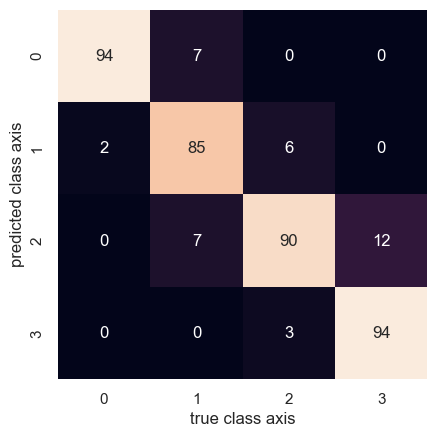

In [51]:
sb.heatmap(confusion.T, square=True, annot=True, fmt='d', cbar=False)
pt.xlabel('true class axis')
pt.ylabel('predicted class axis')